In [1]:
# Applied Data Analysis School: October/november 2020
# 6. REGRESSION ANALYSIS AND CAUSALITY WITH R | By: JoÃ£o Cerejeira | 10 & 12 November
# https://www.gades-solutions.com/project/data-analysis-school/

# setwd("C:\\Users\\mangelo.EEG\\Documents\\GitHub\\R_Training\\regression")

rm(list = ls())

# LOG FILE

# sink("Regression.txt")

# LIBRARIES

library(tidyverse)
library(ggplot2)
library(haven)
library(stargazer)
library(kableExtra)
library(dplyr)
library(dlookr)
library(visdat)
library(naniar)
library(ExPanDaR)
library(SmartEDA)
library(MASS)
library(robustbase)
library(lmtest)
library(sandwich)
library(car)
library(broom)


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



Attaching package: 'kableExtra'


The following object is masked from 'package:dplyr':

    group_rows


Loading required package: mice


Attaching package: 'mice'


The following objects are masked from 'package:base':

    cbind, rbind


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: 'dlookr'


The following object is masked from 'package:base':

    

In [3]:
# DATA

world_data <- as.data.frame(read_dta("world_data.dta"))

names(world_data)
head(world_data)
# View(world_data)
str(world_data)

# dplyr::glimpse(world_data)
dplyr::glimpse(world_data$logGDPpc2000)

ExpData(world_data,type=1)
ExpData(world_data,type=2)


[1] "countrycode"   "logGDPpc2000"  "logGDPpc2015"  "growthGDPpc"  
 [5] "imalaria2000"  "imalaria2015"  "change_malar"  "educ_sec"     
 [9] "life2000"      "trade2000"     "gov2000"       "invest_growth"

,countrycode,logGDPpc2000,logGDPpc2015,growthGDPpc,imalaria2000,imalaria2015,change_malar,educ_sec,life2000,trade2000,gov2000,invest_growth
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ABW,10.254756,10.104492,-1.0017586,NA,NA,NA,55.99243,73.787,145.07318,NA,NA
2,AFG,NA,6.352950,NA,92.64,14.22,-78.42,NA,55.841,NA,-2.2316511,NA
3,AGO,7.694224,8.229063,3.5655911,222.39,154.48,-67.91,NA,46.522,152.54710,-1.4623100,11.79648
4,ALB,7.716297,8.417237,4.6729374,NA,NA,NA,75.73405,73.955,63.45407,-0.7551177,NA
5,AND,10.616475,10.639874,0.1559957,NA,NA,NA,45.88941,NA,NA,1.4462841,NA
6,ARE,11.054874,10.602809,-3.0137699,NA,NA,NA,62.70005,74.327,NA,0.7914957,NA


'data.frame':	218 obs. of  12 variables:
 $ countrycode  : chr  "ABW" "AFG" "AGO" "ALB" ...
  ..- attr(*, "label")= chr "Country Code"
  ..- attr(*, "format.stata")= chr "%9s"
 $ logGDPpc2000 : num  10.25 NA 7.69 7.72 10.62 ...
  ..- attr(*, "label")= chr "Log GDPpc 2000"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ logGDPpc2015 : num  10.1 6.35 8.23 8.42 10.64 ...
  ..- attr(*, "label")= chr "Log GDPpc 2015"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ growthGDPpc  : num  -1.002 NA 3.566 4.673 0.156 ...
  ..- attr(*, "label")= chr "Av. GDPpc growth 2015-2000"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ imalaria2000 : num  NA 92.6 222.4 NA NA ...
  ..- attr(*, "label")= chr "Malaria incidence rate in 2000"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ imalaria2015 : num  NA 14.2 154.5 NA NA ...
  ..- attr(*, "label")= chr "Malaria incidence rate in 2015"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ change_malar : num  NA -78.4 -67.9 NA NA ...
  ..- attr(*, "label")= chr "Change in

Descriptions,Value
<chr>,<chr>
Sample size (nrow),218
No. of variables (ncol),12
No. of numeric/interger variables,11
No. of factor variables,0
No. of text variables,1
No. of logical variables,0
No. of identifier variables,1
No. of date variables,0
No. of zero variance variables (uniform),0


Index,Variable_Name,Variable_Type,Per_of_Missing,No_of_distinct_values
<dbl>,<chr>,<chr>,<dbl>,<int>
1,countrycode,character,0.00000,218
2,logGDPpc2000,numeric,0.11009,195
3,logGDPpc2015,numeric,0.08257,201
4,growthGDPpc,numeric,0.11927,193
5,imalaria2000,numeric,0.54587,100
6,imalaria2015,numeric,0.54587,86
7,change_malar,numeric,0.54587,98
8,educ_sec,numeric,0.54587,100
9,life2000,numeric,0.07798,201


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  5.986  44.351  61.702  61.396  86.109  99.866     119 

,Vname,Group,TN,nNeg,nZero,nPos,NegInf,PosInf,NA_Value,Per_of_Missing,...,CV,IQR,Skewness,Kurtosis,10%,20%,50%,LB.25%,UB.75%,nOutliers
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,change_malar,All,218,94,0,5,0,0,119,54.59,...,-1.84,102.13,-2.91,11.16,-189.74,-133.96,-16.77,-258.63,149.87,7
7,educ_sec,All,218,0,0,99,0,0,119,54.59,...,0.42,41.76,-0.25,-0.98,26.23,39.27,61.70,-18.28,148.75,0
10,gov2000,All,218,110,0,83,0,0,25,11.47,...,-98.73,1.36,0.43,-0.44,-1.16,-0.82,-0.19,-2.78,2.67,0
3,growthGDPpc,All,218,23,0,169,0,0,26,11.93,...,0.93,2.73,0.47,0.41,-0.13,0.59,1.99,-3.24,7.67,3
4,imalaria2000,All,218,0,0,99,0,0,119,54.59,...,1.20,297.89,1.06,0.13,2.59,5.41,57.31,-438.72,752.82,1
5,imalaria2015,All,218,0,14,85,0,0,119,54.59,...,1.46,153.01,1.29,0.22,0.00,0.14,9.97,-229.31,382.73,3
11,invest_growth,All,218,12,0,115,0,0,91,41.74,...,0.86,5.45,1.00,2.82,0.27,1.88,4.68,-6.04,15.76,2
8,life2000,All,218,0,0,201,0,0,17,7.80,...,0.15,14.34,-0.77,-0.50,50.49,57.13,70.18,38.55,95.91,0
1,logGDPpc2000,All,218,0,0,194,0,0,24,11.01,...,0.19,2.42,0.14,-0.92,6.28,6.93,8.22,3.56,13.25,0


Warning message in matrix(data = seq(1, pn), nrow = nr, ncol = nc):
"data length [11] is not a sub-multiple or multiple of the number of rows [6]"


$`0`


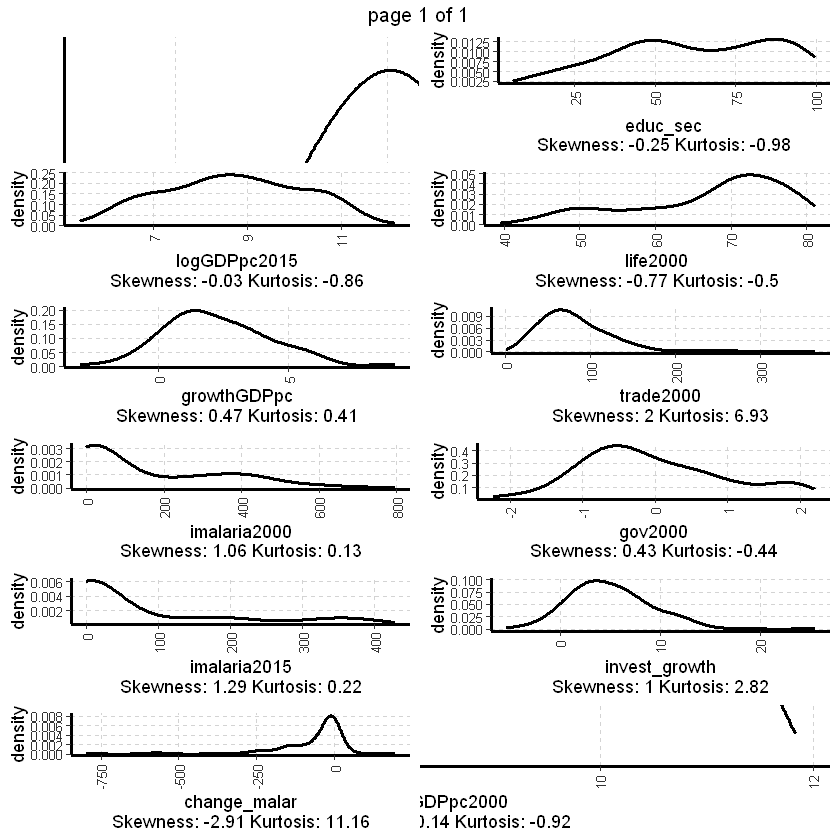

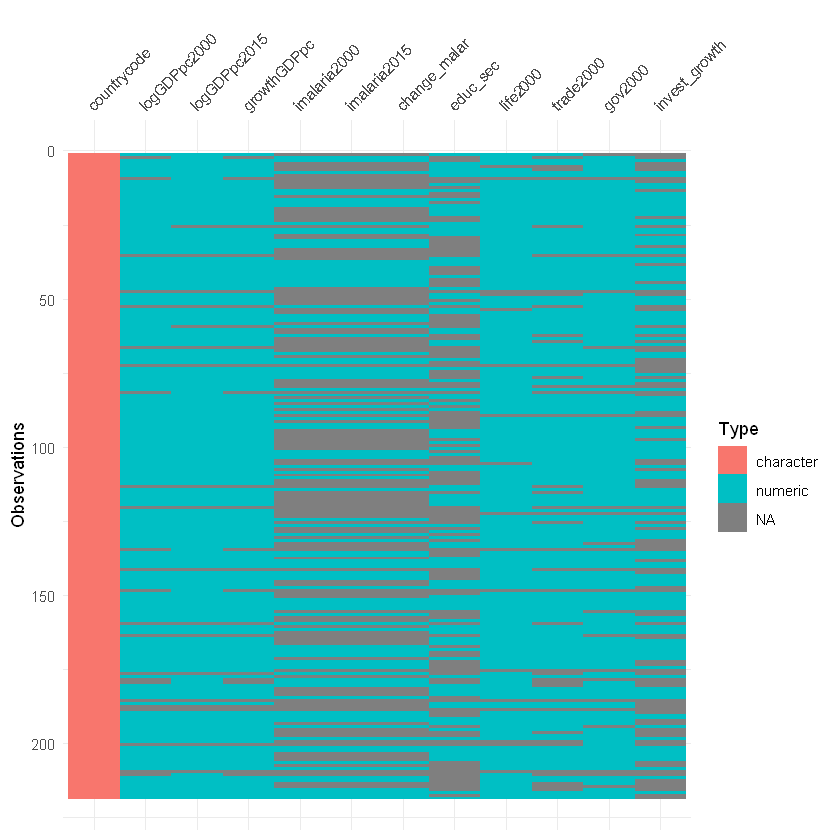

 countrycode         logGDPpc2000     logGDPpc2015     growthGDPpc     
 Length:218         Min.   : 5.285   Min.   : 5.431   Min.   :-3.0138  
 Class :character   1st Qu.: 7.195   1st Qu.: 7.609   1st Qu.: 0.8492  
 Mode  :character   Median : 8.222   Median : 8.745   Median : 1.9916  
                    Mean   : 8.390   Mean   : 8.719   Mean   : 2.2755  
                    3rd Qu.: 9.618   3rd Qu.: 9.794   3rd Qu.: 3.5759  
                    Max.   :11.840   Max.   :12.151   Max.   : 9.0774  
                    NA's   :24       NA's   :18       NA's   :26       
  imalaria2000      imalaria2015      change_malar         educ_sec     
 Min.   :  0.010   Min.   :  0.000   Min.   :-796.380   Min.   : 5.986  
 1st Qu.:  8.105   1st Qu.:  0.205   1st Qu.:-105.440   1st Qu.:44.351  
 Median : 57.310   Median :  9.970   Median : -16.770   Median :61.702  
 Mean   :159.919   Mean   : 87.991   Mean   : -71.928   Mean   :61.396  
 3rd Qu.:305.990   3rd Qu.:153.215   3rd Qu.:  -3.315   3rd


\begin{table}[ht] \centering 
  \caption{Summary statistics} 
  \label{tb:statistcis} 
\begin{tabular}{@{\extracolsep{5pt}}lccccccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
Statistic & \multicolumn{1}{c}{N} & \multicolumn{1}{c}{Mean} & \multicolumn{1}{c}{St. Dev.} & \multicolumn{1}{c}{Min} & \multicolumn{1}{c}{Pctl(25)} & \multicolumn{1}{c}{Pctl(75)} & \multicolumn{1}{c}{Max} \\ 
\hline \\[-1.8ex] 
logGDPpc2000 & 194 & 8.390 & 1.564 & 5.285 & 7.195 & 9.618 & 11.840 \\ 
logGDPpc2015 & 200 & 8.719 & 1.467 & 5.431 & 7.609 & 9.794 & 12.151 \\ 
growthGDPpc & 192 & 2.276 & 2.108 & $-$3.014 & 0.849 & 3.576 & 9.077 \\ 
imalaria2000 & 99 & 159.919 & 191.803 & 0.010 & 8.105 & 305.990 & 796.380 \\ 
imalaria2015 & 99 & 87.991 & 128.829 & 0.000 & 0.205 & 153.215 & 429.040 \\ 
change\_malar & 99 & $-$71.928 & 132.399 & $-$796.380 & $-$105.440 & $-$3.315 & 195.130 \\ 
educ\_sec & 99 & 61.396 & 25.797 & 5.986 & 44.351 & 86.109 & 99.866 \\ 
life2000 & 201 & 67.012 & 10.093 & 39.441 & 60.063 & 74.403 & 8

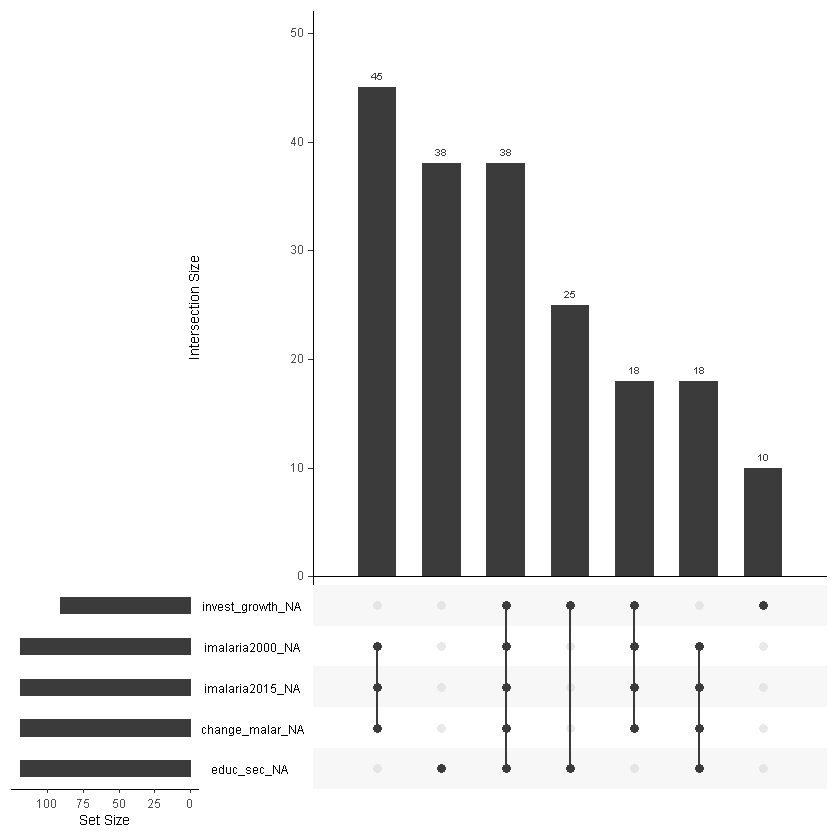

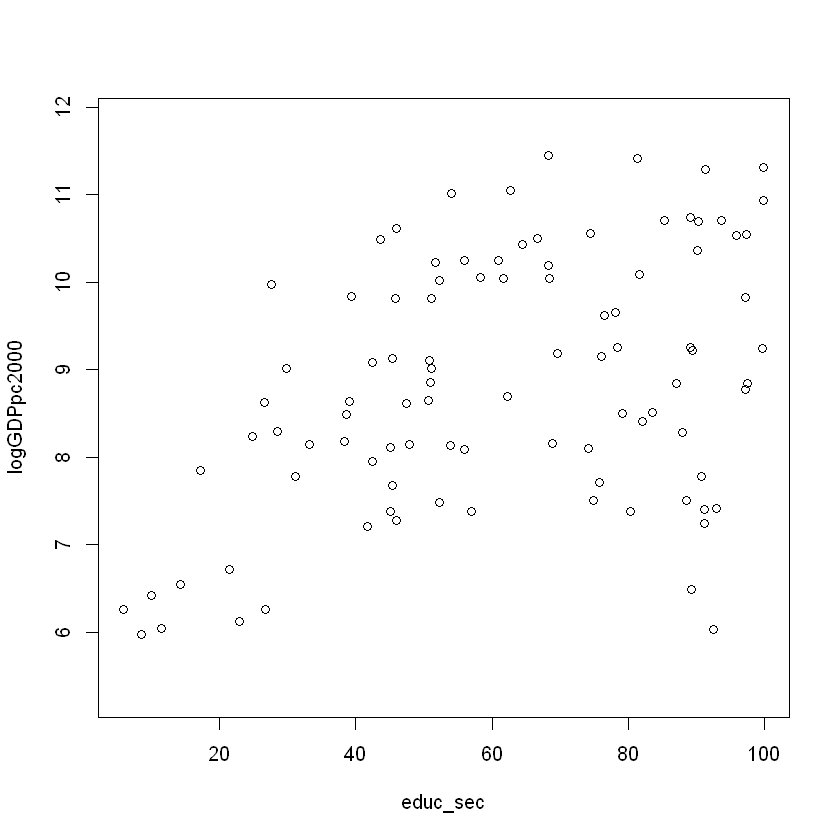

In [4]:
# STATISTICS

## EDA

# eda_report(world_data,output_dir = "EDA/",output_file = "eda_world_data.pdf")

summary(world_data[,"educ_sec"])

ExpNumStat(world_data,by="A",Outlier = TRUE,round=2,Qnt=c(0.1,0.20,0.50))

# ExpCTable(world_data)

# ExpCatViz(world_data)

ExpNumViz(world_data,Page=c(6,2))

## TRY IN A 'JUPYTER NOTEBOOK': ExpNumViz(world_data)

# ExpOutliers(world_data,varlist=c("logGDPpc2000"))

vis_dat(world_data)

# vis_miss(world_data) # ALTERNATIVE

gg_miss_upset(world_data)

## ExPanD(): import the data 'nlswork.dta' and 'ExPanD()' in the Console

summary(world_data)

stargazer(world_data,
          title = "Summary statistics",
          label = "tb:statistcis",
          table.placement = "ht",
          header=FALSE)

## or

stargazer(world_data,
          title = "Summary statistics",
          label = "tb:statistcis",
          table.placement = "ht",
          header=FALSE,type="text")

## or a subset of variables

world_data %>%
  dplyr::select(growthGDPpc,educ_sec) %>% 
  stargazer(title="Shorter statistics",
            label="tb:statistics:short",
            table.placement = "ht",
            header=FALSE,
            type="text")

attach(world_data)
plot(educ_sec,logGDPpc2000)


Warning message:
"Removed 121 rows containing missing values (geom_point)."
Saving 6.67 x 6.67 in image

Warning message:
"Removed 121 rows containing missing values (geom_point)."



Call:
lm(formula = logGDPpc2000 ~ educ_sec)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5613 -1.0600  0.0556  1.1628  2.4293 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.394826   0.349821  21.139  < 2e-16 ***
educ_sec    0.023760   0.005264   4.514 1.82e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.317 on 95 degrees of freedom
  (121 observations deleted due to missingness)
Multiple R-squared:  0.1766,	Adjusted R-squared:  0.1679 
F-statistic: 20.38 on 1 and 95 DF,  p-value: 1.823e-05


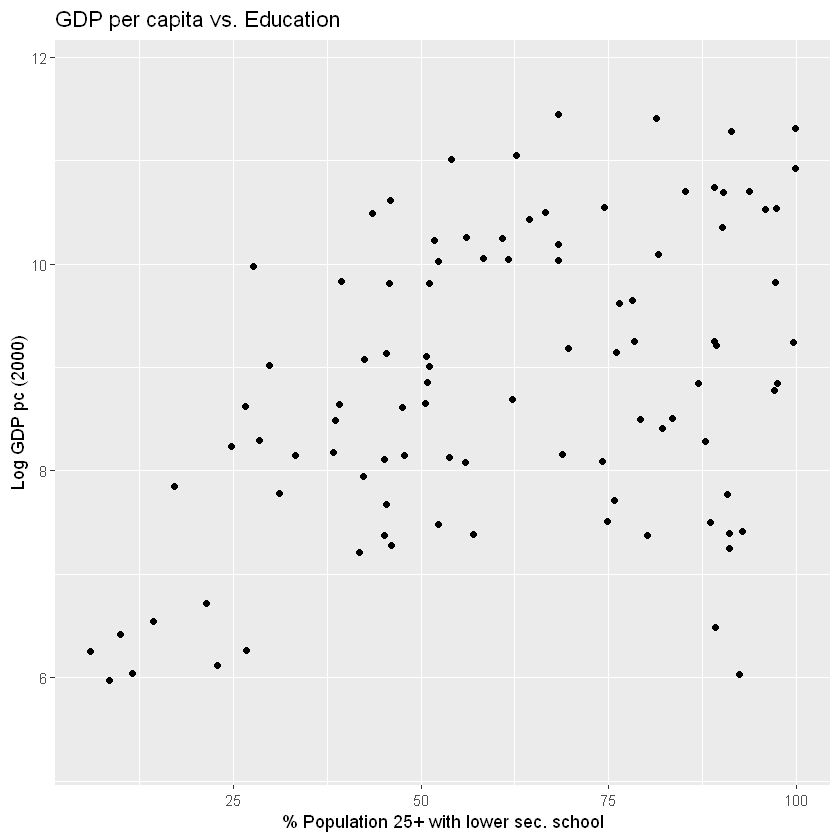

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 121 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 121 rows containing missing values (geom_point)."


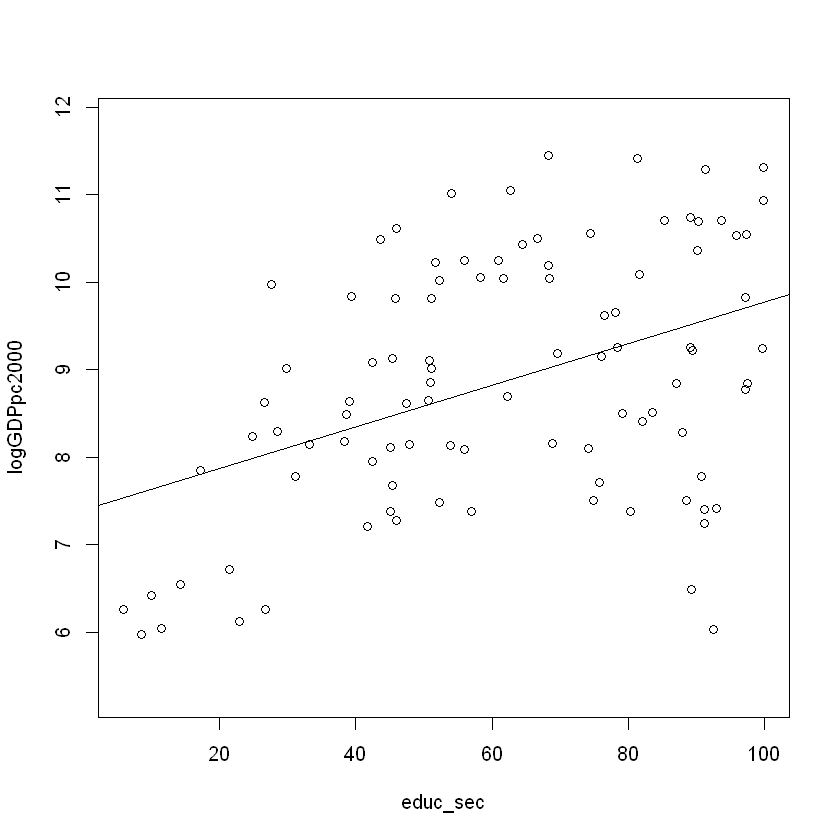

Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 121 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 121 rows containing missing values (geom_point)."


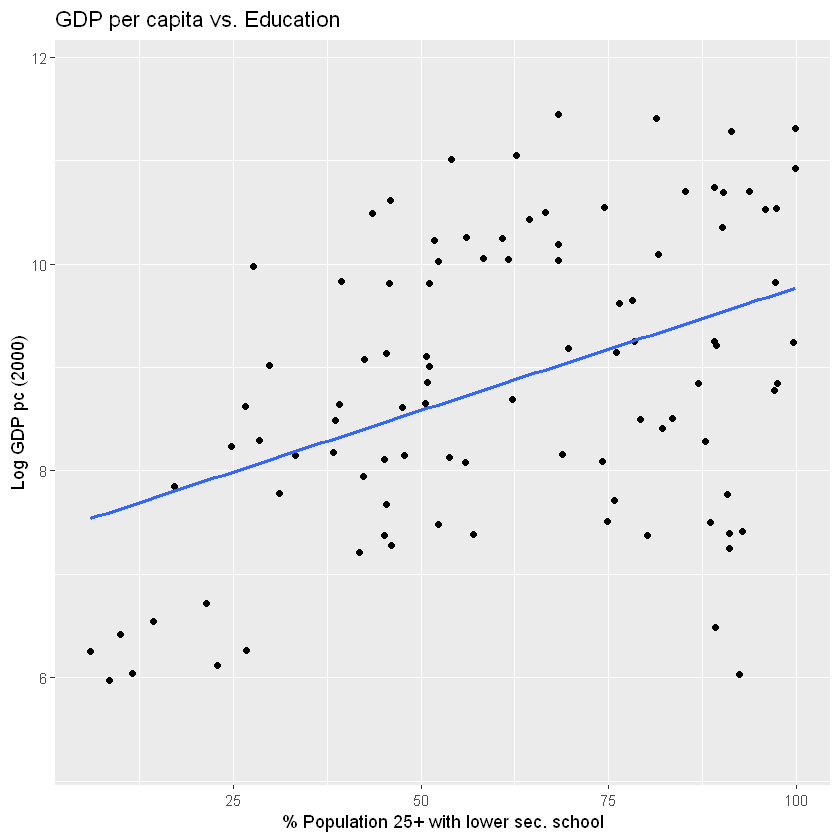

In [5]:
## FIRST CHECK OF THE RELATIONSHIP BETWEEN EDUCATION AND GDP

world_data %>%
  ggplot(aes(educ_sec,logGDPpc2000)) +
  labs(title = "GDP per capita vs. Education") +
  ylab("Log GDP pc (2000)") +
  xlab("% Population 25+ with lower sec. school") +
  geom_point()
  
  ## SAVE YOUR GRAPH

    ggsave("figures/graph1.png")

  ## FIRST REGRESSION

    reg1 <- lm(logGDPpc2000 ~ educ_sec)
      summary(reg1)

        # View(reg1)  # see what happens with this command

  ## FITTED MODEL
    
      ## SIMPLE SOLUTION
      
      plot(educ_sec,logGDPpc2000)
        abline(reg1)
      
      ## 'FANCY' SOLUTION
        
      ggplot(world_data,aes(educ_sec,logGDPpc2000))+
        labs(title = "GDP per capita vs. Education") +
        ylab("Log GDP pc (2000)") +
        xlab("% Population 25+ with lower sec. school") +
        geom_point() +
        geom_smooth(method = "lm",se = FALSE)

      ## EXPORT YOUR GRAPH
      
        ggsave("figures/graph2.png")



Call:
lm(formula = growthGDPpc ~ logGDPpc2000 + educ_sec + invest_growth + 
    trade2000 + gov2000, data = world_data, na.action = na.exclude)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2333 -0.4785 -0.0029  0.6294  3.5823 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.557012   1.843849   3.014  0.00368 ** 
logGDPpc2000  -0.726476   0.216851  -3.350  0.00135 ** 
educ_sec       0.032574   0.006704   4.859 7.79e-06 ***
invest_growth  0.232956   0.043563   5.348 1.23e-06 ***
trade2000      0.005198   0.002567   2.025  0.04696 *  
gov2000       -0.096830   0.313265  -0.309  0.75823    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.224 on 65 degrees of freedom
  (147 observations deleted due to missingness)
Multiple R-squared:  0.5909,	Adjusted R-squared:  0.5594 
F-statistic: 18.78 on 5 and 65 DF,  p-value: 1.674e-11


              Df Sum Sq Mean Sq F value   Pr(>F)    
logGDPpc2000   1  61.16   61.16  40.825 2.05e-08 ***
educ_sec       1  28.02   28.02  18.704 5.36e-05 ***
invest_growth  1  45.29   45.29  30.229 6.91e-07 ***
trade2000      1   6.04    6.04   4.033   0.0488 *  
gov2000        1   0.14    0.14   0.096   0.7582    
Residuals     65  97.38    1.50                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
147 observations deleted due to missingness

                (Intercept)  logGDPpc2000      educ_sec invest_growth
(Intercept)    3.3997778995 -3.838101e-01  2.808327e-04 -2.381767e-02
logGDPpc2000  -0.3838100668  4.702440e-02 -3.548833e-04  1.597596e-03
educ_sec       0.0002808327 -3.548833e-04  4.494372e-05  2.344525e-05
invest_growth -0.0238176748  1.597596e-03  2.344525e-05  1.897755e-03
trade2000     -0.0004613550 -5.556980e-06  7.067824e-07 -7.114476e-06
gov2000        0.4269619849 -5.055677e-02 -1.074546e-04  1.516299e-03
                  trade2000       gov2000
(Intercept)   -4.613550e-04  0.4269619849
logGDPpc2000  -5.556980e-06 -0.0505567717
educ_sec       7.067824e-07 -0.0001074546
invest_growth -7.114476e-06  0.0015162991
trade2000      6.587727e-06 -0.0001871097
gov2000       -1.871097e-04  0.0981352360


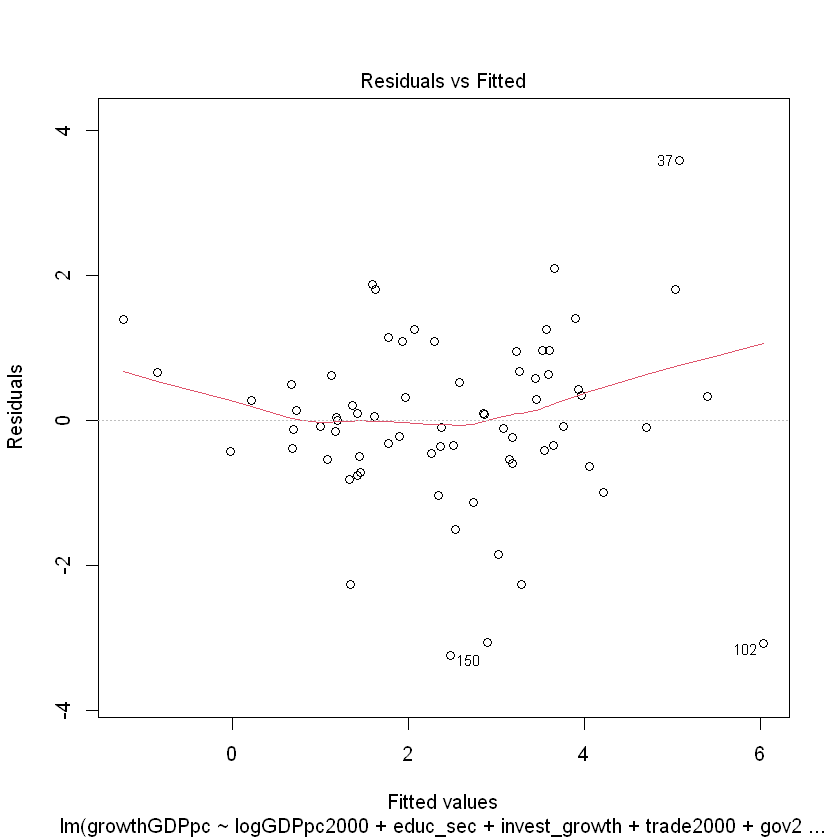

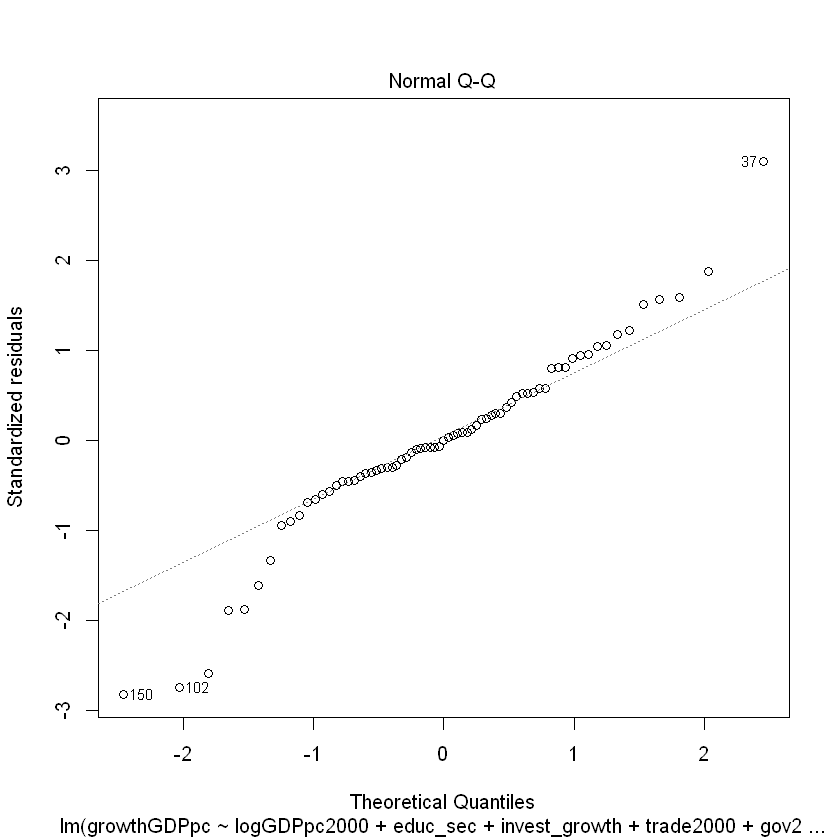

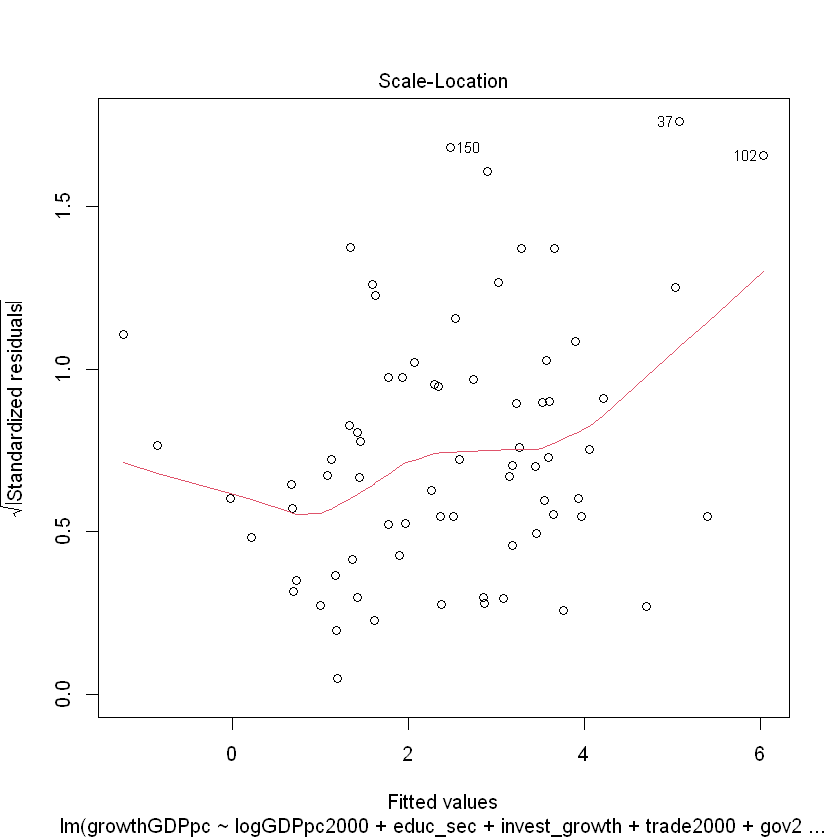

Warning message:
"Removed 122 rows containing missing values (geom_point)."
Warning message:
"Removed 147 rows containing missing values (geom_point)."


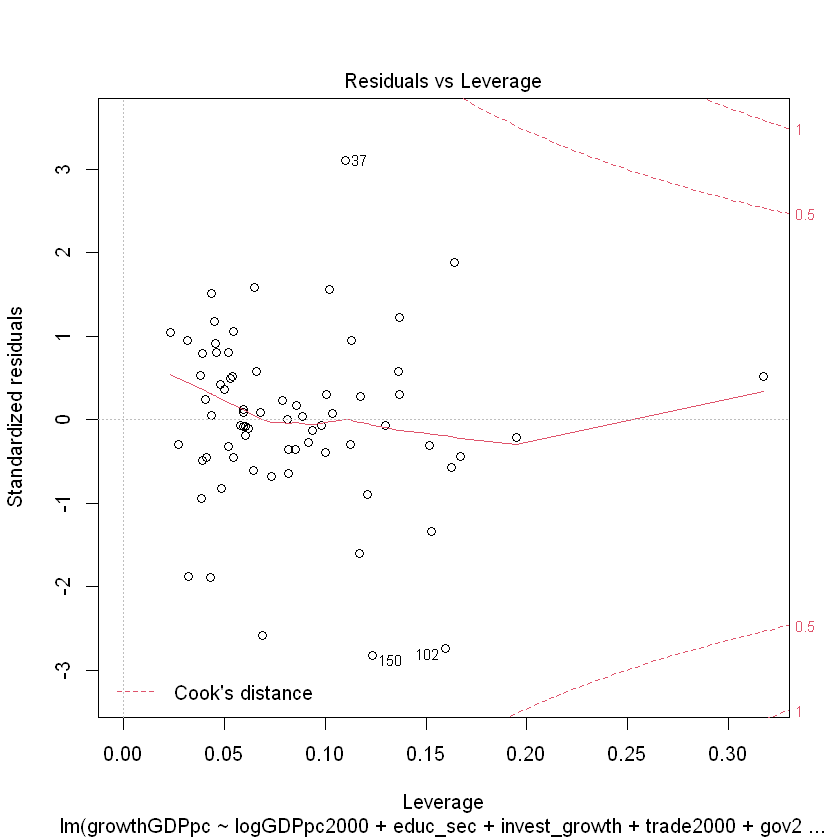

Saving 6.67 x 6.67 in image

Warning message:
"Removed 122 rows containing missing values (geom_point)."
Warning message:
"Removed 147 rows containing missing values (geom_point)."
Warning message:
"Removed 122 rows containing missing values (geom_point)."
Warning message:
"Removed 147 rows containing missing values (geom_point)."


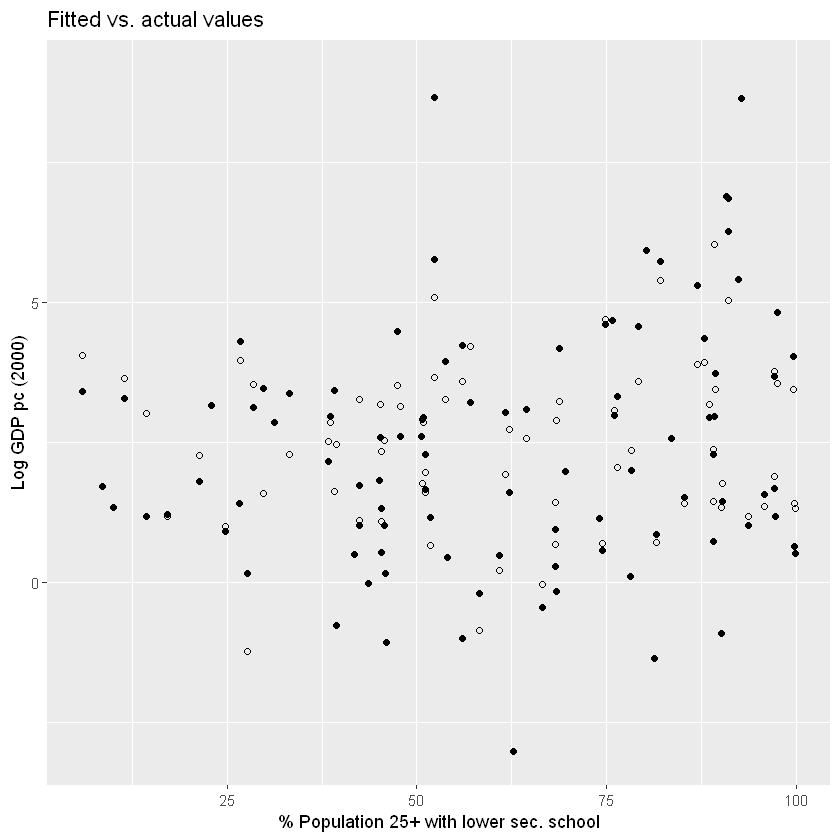

Saving 6.67 x 6.67 in image

Warning message:
"Removed 122 rows containing missing values (geom_point)."
Warning message:
"Removed 147 rows containing missing values (geom_point)."



Regression analysis
                           Model 1            
Log GDPpc 2000            -0.73***            
                           (0.22)             
Educ Sec                   0.03***            
                           (0.01)             
invest_growth              0.23***            
                           (0.04)             
trade2000                  0.01**             
                           (0.003)            
gov2000                     -0.10             
                           (0.31)             
N                            71               
R2                          0.59              
Notes:         Standard errors in parentheses.

Regression analysis
                       Model 1 Model 2  Model 3  Model 4 
Log GDPpc 2000                 -0.73*** -0.79*** -0.79***
                                (0.22)   (0.22)   (0.22) 
Educ Sec               0.04*** 0.03***   0.02**   0.02** 
                       (0.003)  (0.01)   (0.01)   (0.01) 
invest_gro

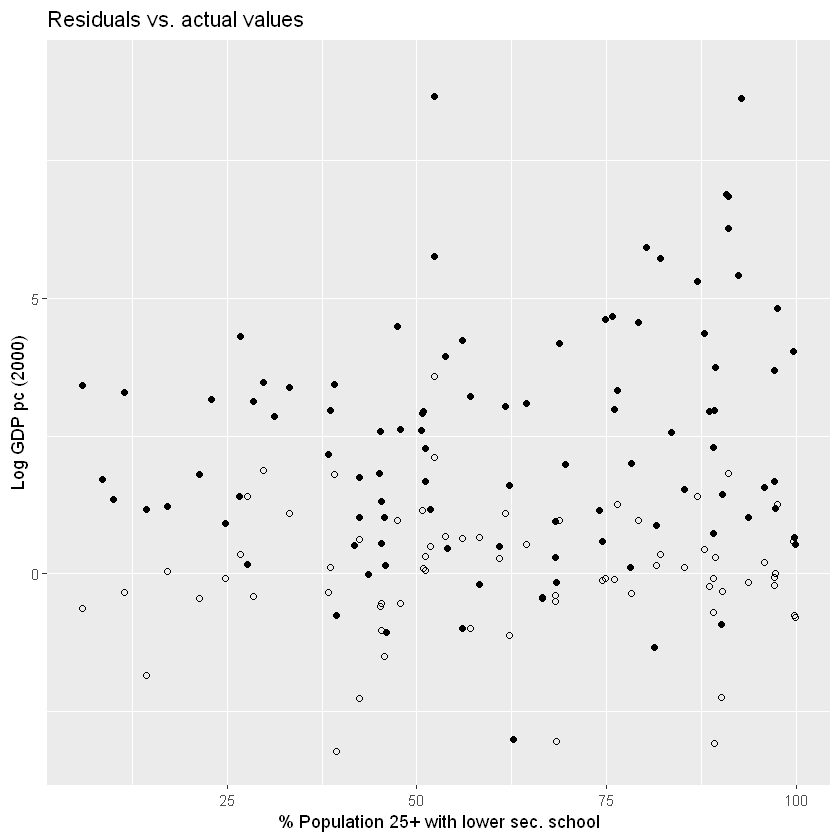

In [6]:
# <<>> --- REGRESSION ANALYSIS --- <<>> #

## Example 1
  
  ## REGRESSION
    
    M1 <- lm(data=world_data, growthGDPpc ~ logGDPpc2000 + educ_sec + invest_growth + trade2000 + gov2000,na.action = na.exclude)
      summary(M1)
  
  ## ANOVA
    
    M1.aov <- aov(data=world_data, growthGDPpc ~ logGDPpc2000 + educ_sec + invest_growth + trade2000 + gov2000,na.action = na.exclude)
      summary(M1.aov)
  
  ## VCE Estimates
    
    print(vcov(M1))
  
  ## Predicted and actual Growth log GDP pc vs. Education
    
    plot(M1)

    world_data$predicted <- predict(M1)
    world_data$residuals <- residuals(M1)
    
      world_data$residuals_sq <- residuals(M1)^2  # SQUARED RESIDUALS

    ggplot(world_data,aes(educ_sec,growthGDPpc))+
      labs(title = "Fitted vs. actual values") +
      ylab("Log GDP pc (2000)") +
      xlab("% Population 25+ with lower sec. school") +
      geom_point() +
      geom_point(aes(y=predicted),shape=1)

    ggsave("figures/graph3.png")
    
    ggplot(world_data,aes(educ_sec,growthGDPpc))+
      labs(title = "Residuals vs. actual values") +
      ylab("Log GDP pc (2000)") +
      xlab("% Population 25+ with lower sec. school") +
      geom_point() +
      geom_point(aes(y=residuals),shape=1)
    
    ggsave("figures/graph4.png")
    
    ## Output table

    
  stargazer(M1,title = "Regression analysis", model.numbers = FALSE,column.labels = c("Model 1"),label = "regressions",table.placement = "!ht",notes.append = FALSE,notes.align="l",notes="Standard errors in parentheses.",header = FALSE,no.space = TRUE,covariate.labels = c("Log GDPpc 2000","Educ Sec"),omit = c("Constant"),omit.stat = c("adj.rsq","f","ser"),digits = 2,digits.extra = 4,omit.yes.no = c("Constant",""),dep.var.caption="",dep.var.labels.include = FALSE,style = "qje",type="text")

  M2 <- lm(data=world_data, growthGDPpc ~ logGDPpc2000 + educ_sec + invest_growth + educ_sec:invest_growth + trade2000 + gov2000)
  M3 <- lm(data=world_data, growthGDPpc ~ logGDPpc2000 + educ_sec * invest_growth + trade2000 + gov2000)

  ## model without constant
  
  M0 <- lm(data=world_data, growthGDPpc ~ 0 + educ_sec)
  
  stargazer(M0,M1,M2,M3,title = "Regression analysis", 
            model.numbers = FALSE,
            column.labels = c("Model 1","Model 2","Model 3","Model 4"),
            label = "regressions",
            table.placement = "!ht",
            notes.append = FALSE,
            notes.align="l",
            notes="Standard errors in parentheses.",
            header = FALSE,
            no.space = TRUE,
            covariate.labels = c("Log GDPpc 2000","Educ Sec"),
            omit = c("Constant"),
            omit.stat = c("adj.rsq","f","ser"),
            digits = 2,
            digits.extra = 4,
            omit.yes.no = c("Constant",""),
            dep.var.caption="",
            dep.var.labels.include = FALSE,
            style = "qje",
            type="text")
  
# <<>> --- END --- <<>> #


In [7]:
  ## CATEGORICAL VARIABLES AND INTERACTIONS
  
  nlswork <- as.data.frame(read_dta("nlswork.dta"))
    table(nlswork$race)
  
  ## ADD A VARIALE
  nlswork$race.f <- factor(nlswork$race)
    is.factor(nlswork$race.f)
  
  str(nlswork$race)
  
  ## DEFINE THE REFERENCE CATEGORY
  
  summary(lm(ln_wage ~ relevel(factor(race),ref = 3),data=nlswork,na.action = na.exclude))
  
  mm1 <- lm(ln_wage ~ hours,data=nlswork,na.action = na.exclude)
  summary(mm1)
  
    print(mm1$coefficients)
    print(mm1$coefficients[2])
    print(vcov(mm1))
    print(vcov(mm1)[2,2])
    summary(mm1)
    print(vcov(mm1)[2,2]^.5)
  
  mm2 <- lm(ln_wage ~ factor(race),data=nlswork,na.action = na.exclude)
  summary(mm2)

  names(nlswork)
  
  mm3 <- lm(ln_wage ~ hours * factor(race),data=nlswork,na.action = na.exclude)
  summary(mm3)
  
  stargazer(mm1,mm2, mm3,title = "Regression analysis", 
            model.numbers = FALSE,
            column.labels = c("Model 1","Model 2","Model 3"),
            label = "regressions",
            table.placement = "!ht",
            notes.append = FALSE,
            notes.align="l",
            notes="Standard errors in parentheses.",
            header = FALSE,
            no.space = TRUE,
            omit.stat = c("adj.rsq","f","ser"),
            digits = 2,
            digits.extra = 4,
            omit.yes.no = c("Constant",""),
            dep.var.caption="",
            dep.var.labels.include = FALSE,
            style = "qje",
            type="text")



    1     2     3 
20180  8051   303 

[1] TRUE

 dbl+lbl [1:28534] 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,...
 @ label       : chr "race"
 @ format.stata: chr "%8.0g"
 @ labels      : Named num [1:3] 1 2 3
  ..- attr(*, "names")= chr [1:3] "white" "black" "other"



Call:
lm(formula = ln_wage ~ relevel(factor(race), ref = 3), data = nlswork, 
    na.action = na.exclude)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7143 -0.3046 -0.0348  0.2831  3.5496 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      1.79501    0.02721  65.971  < 2e-16 ***
relevel(factor(race), ref = 3)1 -0.08067    0.02741  -2.943  0.00325 ** 
relevel(factor(race), ref = 3)2 -0.22346    0.02772  -8.062 7.78e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4736 on 28531 degrees of freedom
Multiple R-squared:  0.01867,	Adjusted R-squared:  0.0186 
F-statistic: 271.4 on 2 and 28531 DF,  p-value: < 2.2e-16



Call:
lm(formula = ln_wage ~ hours, data = nlswork, na.action = na.exclude)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1854 -0.3074 -0.0361  0.2860  3.6244 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.5225145  0.0108276  140.62   <2e-16 ***
hours       0.0041790  0.0002859   14.62   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4761 on 28465 degrees of freedom
  (67 observations deleted due to missingness)
Multiple R-squared:  0.007449,	Adjusted R-squared:  0.007414 
F-statistic: 213.6 on 1 and 28465 DF,  p-value: < 2.2e-16


(Intercept)       hours 
1.522514490 0.004179043 
      hours 
0.004179043 
              (Intercept)         hours
(Intercept)  1.172359e-04 -2.988892e-06
hours       -2.988892e-06  8.175404e-08
[1] 8.175404e-08



Call:
lm(formula = ln_wage ~ hours, data = nlswork, na.action = na.exclude)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1854 -0.3074 -0.0361  0.2860  3.6244 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.5225145  0.0108276  140.62   <2e-16 ***
hours       0.0041790  0.0002859   14.62   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4761 on 28465 degrees of freedom
  (67 observations deleted due to missingness)
Multiple R-squared:  0.007449,	Adjusted R-squared:  0.007414 
F-statistic: 213.6 on 1 and 28465 DF,  p-value: < 2.2e-16


[1] 0.0002859266



Call:
lm(formula = ln_wage ~ factor(race), data = nlswork, na.action = na.exclude)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7143 -0.3046 -0.0348  0.2831  3.5496 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.714338   0.003334 514.187  < 2e-16 ***
factor(race)2 -0.142786   0.006243 -22.870  < 2e-16 ***
factor(race)3  0.080671   0.027413   2.943  0.00325 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4736 on 28531 degrees of freedom
Multiple R-squared:  0.01867,	Adjusted R-squared:  0.0186 
F-statistic: 271.4 on 2 and 28531 DF,  p-value: < 2.2e-16


[1] "idcode"   "year"     "birth_yr" "age"      "race"     "msp"     
 [7] "nev_mar"  "grade"    "collgrad" "not_smsa" "c_city"   "south"   
[13] "ind_code" "occ_code" "union"    "wks_ue"   "ttl_exp"  "tenure"  
[19] "hours"    "wks_work" "ln_wage"  "race.f"


Call:
lm(formula = ln_wage ~ hours * factor(race), data = nlswork, 
    na.action = na.exclude)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2250 -0.2977 -0.0372  0.2773  3.5830 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.5642487  0.0119505 130.894  < 2e-16 ***
hours                0.0041663  0.0003176  13.118  < 2e-16 ***
factor(race)2       -0.2297101  0.0276857  -8.297  < 2e-16 ***
factor(race)3       -0.0555371  0.0990365  -0.561  0.57496    
hours:factor(race)2  0.0021478  0.0007231   2.970  0.00298 ** 
hours:factor(race)3  0.0034971  0.0025710   1.360  0.17377    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4712 on 28461 degrees of freedom
  (67 observations deleted due to missingness)
Multiple R-squared:  0.02811,	Adjusted R-squared:  0.02794 
F-statistic: 164.7 on 5 and 28461 DF,  p-value: < 2.2e-16



Regression analysis
                      Model 1    Model 2    Model 3  
hours                0.004***               0.004*** 
                     (0.0003)               (0.0003) 
factor(race)2                    -0.14***   -0.23*** 
                                  (0.01)     (0.03)  
factor(race)3                    0.08***     -0.06   
                                  (0.03)     (0.10)  
hours:factor(race)2                         0.002*** 
                                            (0.001)  
hours:factor(race)3                          0.003   
                                            (0.003)  
Constant              1.52***    1.71***    1.56***  
                      (0.01)     (0.003)     (0.01)  
N                     28,467      28,534     28,467  
R2                     0.01        0.02       0.03   
Notes:              Standard errors in parentheses.  


[1] 38540.22

[1] 38564.99

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,28466,6501.223,NA,NA,NA,NA
2,28465,6452.797,1,48.4263,213.6212,3.331646e-48


,GVIF,Df,GVIF^(1/(2*Df))
hours,1.259969,1,1.122483
factor(race),259.310717,2,4.012870
hours:factor(race),266.481272,2,4.040328


[1] 129.1372


	studentized Breusch-Pagan test

data:  mm4
BP = 129.14, df = 1, p-value < 2.2e-16



	studentized Breusch-Pagan test

data:  mm4
BP = 776.43, df = 2, p-value < 2.2e-16



                                      Dependent variable:                   
                    --------------------------------------------------------
                               ln_wage                                      
                                 OLS                      coefficient       
                                                             test           
                                 (1)                   (2)          (3)     
----------------------------------------------------------------------------
hours                        0.0041790***          0.0041790*** 0.0041790***
                             (0.0002859)           (0.0003847)  (0.0003847) 
                                                                            
Constant                     1.5225140***          1.5225140*** 1.5225140***
                             (0.0108276)           (0.0146145)  (0.0146139) 
                                                                           

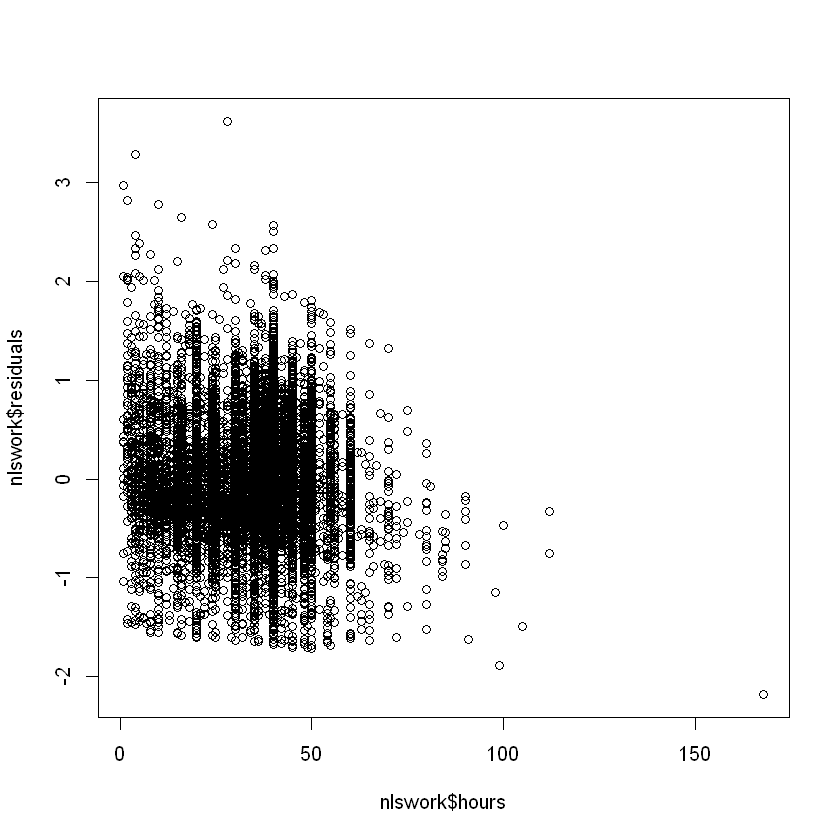

In [8]:
    ## AIC & BIC
    
      AIC(mm1)
      BIC(mm1)
    
    ## HYPOTHESIS TESTING    
    
      linearHypothesis(mm1,c("hours=0"))
    
    ## COLINEARITY: VIF
    
      car::vif(mm3)
    
    ## HETEROSKEDASTICITY
      
      mm4 <- lm(ln_wage ~ hours,data=nlswork,na.action = na.exclude)
      nlswork$residuals <- residuals(mm4)
        plot(nlswork$hours,nlswork$residuals)
      
        nlswork$residuals_sq <- residuals(mm4)^2
        
        bp <- summary(lm(residuals_sq ~ hours,data=nlswork,na.action = na.exclude))
        
          bp$r.squared*nrow(as.data.frame(bp$residuals))
        
        ## Breusch-Pagan test
          bptest(mm4)
        
        ## White test
          bptest(mm4,~ hours + I(hours^2),data=nlswork)
      
      ## Robust estimation
        r1mm4 <- coeftest(mm4,vcov =vcovHC(mm1,type = "HC1"))   # HC1 gives us the White standard errors
        r2mm4 <- coeftest(mm4,vcov =sandwich)
        stargazer(mm4,r1mm4,r2mm4,
                  digits = 7,
                  digits.extra = 10,
                  type="text")


In [10]:
# Instrumental variables
  library(ivreg)
        card <- read_dta("card.dta")
        
        ols <- lm(data=card,lwage ~ educ + exper)
        iv <- ivreg(data=card,lwage ~ educ + exper | educ + nearc4)

        stargazer(ols,iv,title = "Regression analysis", 
                  model.numbers = FALSE,
                  column.labels = c("Model 1","Model 2"),
                  label = "regressions",
                  table.placement = "!ht",
                  notes.append = FALSE,
                  notes.align="l",
                  notes="Standard errors in parentheses.",
                  header = FALSE,
                  no.space = TRUE,
                  covariate.labels = c("Education","Experience"),
                  omit = c("Constant"),
                  omit.stat = c("adj.rsq","f","ser"),
                  digits = 2,
                  digits.extra = 4,
                  omit.yes.no = c("Constant",""),
                  dep.var.caption="",
                  dep.var.labels.include = FALSE,
                  style = "qje",
                  type="text")
        
## Tests and diagnosis
        
        summary(iv,vcov=sandwich,diagnostics = TRUE)



Regression analysis
                 OLS         instrumental  
                               variable    
               Model 1          Model 2    
-------------------------------------------
Education      0.09***          0.45***    
               (0.004)          (0.16)     
Experience     0.04***          0.39**     
               (0.002)          (0.16)     
N               3,010            3,010     
R2               0.18            -5.89     
Notes:     Standard errors in parentheses. 



Call:
ivreg(formula = lwage ~ educ + exper | educ + nearc4, data = card)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9871 -0.9077  0.1802  0.9349  2.8622 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -3.0929     3.4585  -0.894  0.37123   
educ          0.4454     0.1572   2.833  0.00464 **
exper         0.3893     0.1552   2.508  0.01221 * 

Diagnostic tests:
                  df1  df2 statistic  p-value    
Weak instruments    1 3007     5.902   0.0152 *  
Wu-Hausman          1 3006    42.997 6.43e-11 ***
Sargan              0   NA        NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.165 on 3007 degrees of freedom
Multiple R-Squared: -5.891,	Adjusted R-squared: -5.896 
Wald test: 23.57 on 2 and 3007 DF,  p-value: 6.936e-11 


In [12]:
# Diff-in-Diff
        
  hh_9198 <- read_dta("hh_9198_v2.dta")
  
  hh_9198$lnland <- log(1+hh_9198$hhland/100)
  
  attach(hh_9198)
  
  # dfmfd=treated: HH has female microcredit participant: 1=Y, 0=N
  # year=after: Year of observation: 0=1991, 1=1998
  # exptot: HH per capita total expenditure: Tk/year
  # lexptot = ln(exptot)
  
  str(hh_9198)
  ExpData(hh_9198,type=1)
  ExpData(hh_9198,type=2)
  
  ftable(hh_9198$treated,hh_9198$after)
  
  DiD1 <- lm(data=hh_9198,lexptot ~ factor(treated)*factor(after))
  
  DiD2 <- lm(data=hh_9198,lexptot ~ factor(treated)*factor(after) + 
               sexhead + agehead + educhead + lnland + vaccess + 
               pcirr + rice + wheat + milk + oil + egg)
  
  stargazer(DiD1,DiD2,title = "Regression analysis", 
            model.numbers = FALSE,
            column.labels = c("Model 1","Model 2"),
            label = "regressions",
            table.placement = "!ht",
            notes.append = FALSE,
            notes.align="l",
            notes="Standard errors in parentheses.",
            header = FALSE,
            no.space = TRUE,
            covariate.labels = c("Treated0","After"),
            omit = c("Constant"),
            omit.stat = c("adj.rsq","f","ser"),
            digits = 2,
            digits.extra = 4,
            omit.yes.no = c("Constant",""),
            dep.var.caption="",
            dep.var.labels.include = FALSE,
            style = "qje",
            type="text")
  
# sink()


The following object is masked from package:robustbase:

    milk




tibble [1,652 x 30] (S3: tbl_df/tbl/data.frame)
 $ nh      : num [1:1652] 11054 11054 11061 11061 11081 ...
  ..- attr(*, "label")= chr "HH ID"
  ..- attr(*, "format.stata")= chr "%7.0f"
 $ year    : num [1:1652] 0 1 0 1 0 1 0 1 0 1 ...
  ..- attr(*, "label")= chr "Year of observation: 0=1991, 1=1998"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ villid  : num [1:1652] 1 1 1 1 1 1 1 1 2 2 ...
  ..- attr(*, "label")= chr "Village ID"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ thanaid : num [1:1652] 1 1 1 1 1 1 1 1 1 1 ...
  ..- attr(*, "label")= chr "Thana ID"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ agehead : num [1:1652] 72 79 35 43 54 52 44 48 28 35 ...
  ..- attr(*, "label")= chr "Age of HH head: years"
  ..- attr(*, "format.stata")= chr "%3.0f"
 $ sexhead : num [1:1652] 1 1 1 1 1 0 1 1 1 1 ...
  ..- attr(*, "label")= chr "Gender of HH head: 1=M, 0=F"
  ..- attr(*, "format.stata")= chr "%2.0f"
 $ educhead: num [1:1652] 0 0 5 6 3 0 5 0 8 10 ...
  ..- attr(*, "label")= chr "Ed

Descriptions,Value
<chr>,<chr>
Sample size (nrow),1652
No. of variables (ncol),30
No. of numeric/interger variables,30
No. of factor variables,0
No. of text variables,0
No. of logical variables,0
No. of identifier variables,0
No. of date variables,0
No. of zero variance variables (uniform),0


Index,Variable_Name,Variable_Type,Per_of_Missing,No_of_distinct_values
<dbl>,<chr>,<chr>,<dbl>,<int>
1,nh,numeric,0,826
2,year,numeric,0,2
3,villid,numeric,0,3
4,thanaid,numeric,0,29
5,agehead,numeric,0,64
6,sexhead,numeric,0,2
7,educhead,numeric,0,17
8,famsize,numeric,0,18
9,hhland,numeric,0,313


     0   1
          
0  391 391
1  435 435


Regression analysis
                                    Model 1          Model 2    
Treated0                            -0.11***          -0.01     
                                     (0.03)          (0.03)     
After                               0.15***          0.25***    
                                     (0.03)          (0.05)     
sexhead                                              -0.08**    
                                                     (0.04)     
agehead                                              0.001*     
                                                     (0.001)    
educhead                                             0.04***    
                                                     (0.003)    
lnland                                               0.21***    
                                                     (0.02)     
vaccess                                               -0.02     
                                                     (0.04)     
pcir